In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import re

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from tensorflow import keras
from tensorflow.keras import layers
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics import tsaplots
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pathlib import Path
from datetime import timedelta
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from warnings import simplefilter
simplefilter('ignore')

In [2]:
tf.__version__

'2.16.1'

In [3]:
plt.rc('figure', autolayout = True)
plt.rc('axes', labelsize = 10, labelweight = 'bold', titlesize = 10, titleweight = 'bold', titlepad = 10)

In [4]:
df = pd.read_csv(r"data/train_2.csv/train_2.csv")

In [5]:
df.size

116630652

In [6]:
# check for missing values
missing_values = df.isnull().sum()
missing_values

Page              0
2015-07-01    20740
2015-07-02    20816
2015-07-03    20544
2015-07-04    20654
              ...  
2017-09-06     1775
2017-09-07     3467
2017-09-08     1061
2017-09-09     3332
2017-09-10     5578
Length: 804, dtype: int64

In [7]:
df.shape

(145063, 804)

In [8]:
# total missing values
total_missing_values = missing_values.sum()
total_missing_values

7027348

In [9]:
# total datasets count present in the dataset
total_values = np.product(df.shape)
total_values

116630652

In [10]:
# total percent of missing values
percent = (total_missing_values / total_values) * 100
percent

6.025301136102712

In [11]:
# Data Cleaning with filling the missing values
df = df.fillna(0)
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,19.0,33.0,33.0,18.0,16.0,27.0,29.0,23.0,54.0,38.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,32.0,30.0,11.0,19.0,54.0,25.0,26.0,23.0,13.0,81.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,6.0,6.0,7.0,2.0,4.0,7.0,3.0,4.0,7.0,6.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,7.0,19.0,19.0,9.0,6.0,16.0,19.0,30.0,38.0,4.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,16.0,19.0,9.0,20.0,23.0,28.0,14.0,8.0,7.0


In [12]:
df

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,19.0,33.0,33.0,18.0,16.0,27.0,29.0,23.0,54.0,38.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,32.0,30.0,11.0,19.0,54.0,25.0,26.0,23.0,13.0,81.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,6.0,6.0,7.0,2.0,4.0,7.0,3.0,4.0,7.0,6.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,7.0,19.0,19.0,9.0,6.0,16.0,19.0,30.0,38.0,4.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,16.0,19.0,9.0,20.0,23.0,28.0,14.0,8.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,Underworld_(serie_de_películas)_es.wikipedia.o...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,3.0,6.0,5.0,2.0,4.0,4.0,8.0,2.0
145059,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,7.0,5.0,0.0,5.0,5.0,2.0,2.0,4.0
145060,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.0,25.0,22.0,47.0,42.0,13.0,9.0,21.0,16.0,6.0
145061,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,6.0,5.0,1.0,5.0,8.0,2.0,4.0,3.0,3.0


In [13]:
# calculating the dataframe
train_data = pd.melt(df,id_vars=['Page'],var_name='Date',value_name='Visits')
train_data.head()

,Page,Date,Visits
0,2NE1_zh.wikipedia.org_all-access_spider,2015-07-01,18.0
1,2PM_zh.wikipedia.org_all-access_spider,2015-07-01,11.0
2,3C_zh.wikipedia.org_all-access_spider,2015-07-01,1.0
3,4minute_zh.wikipedia.org_all-access_spider,2015-07-01,35.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2015-07-01,0.0


In [14]:
train_data.shape

(116485589, 3)

In [15]:
train_data['Date'] = pd.DatetimeIndex(train_data['Date'])
train_data.head()

,Page,Date,Visits
0,2NE1_zh.wikipedia.org_all-access_spider,2015-07-01,18.0
1,2PM_zh.wikipedia.org_all-access_spider,2015-07-01,11.0
2,3C_zh.wikipedia.org_all-access_spider,2015-07-01,1.0
3,4minute_zh.wikipedia.org_all-access_spider,2015-07-01,35.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2015-07-01,0.0


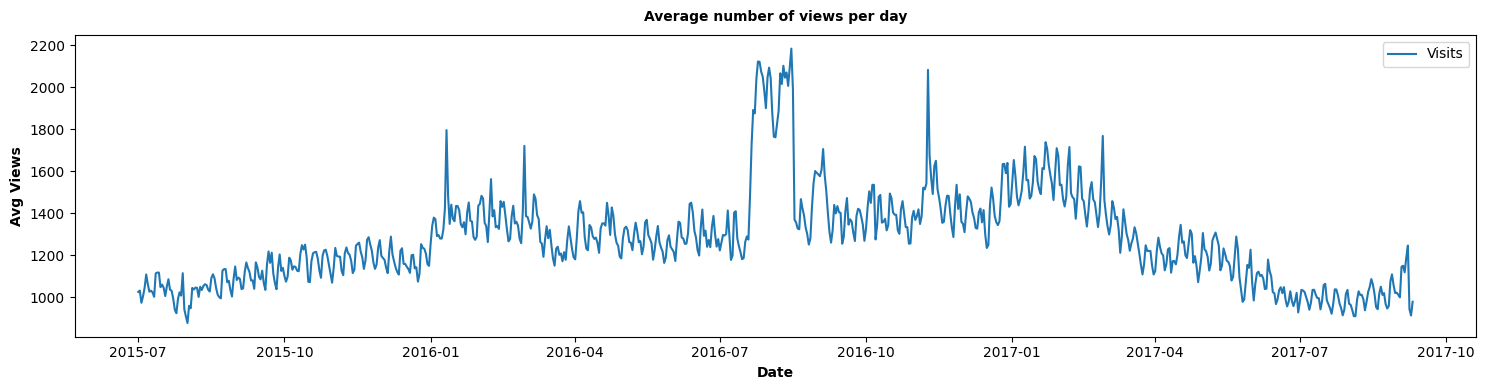

In [16]:
# Data Visualization
temp = train_data.groupby('Date')['Visits'].mean()
plt.figure(figsize = (15,4))
plt.xlabel('Date')
plt.ylabel('Avg Views')
plt.title('Average number of views per day')
plt.plot(temp,label='Visits')
plt.legend()
plt.show()

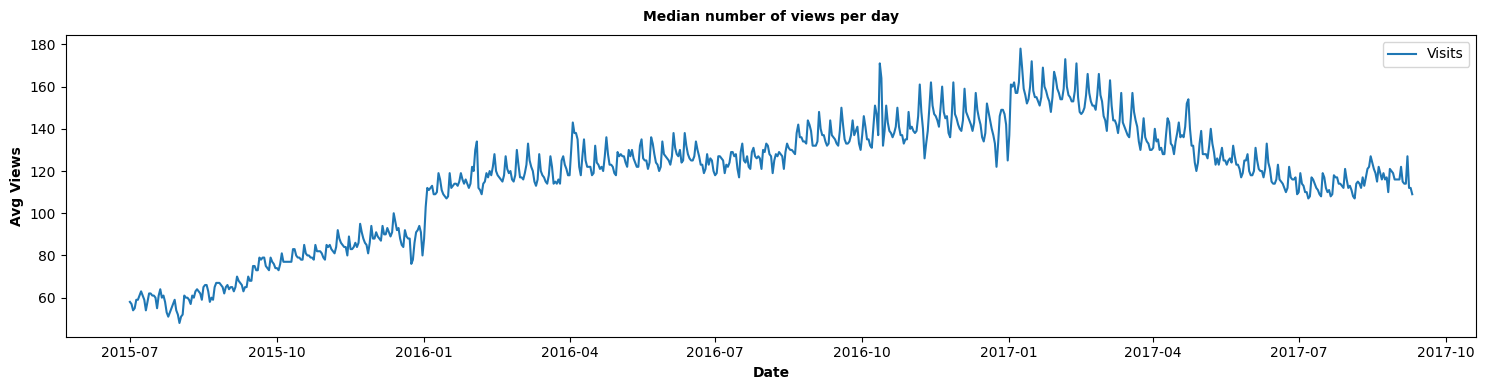

In [17]:
# Data Visualization
temp = train_data.groupby('Date')['Visits'].median()
plt.figure(figsize = (15,4))
plt.xlabel('Date')
plt.ylabel('Avg Views')
plt.title('Median number of views per day')
plt.plot(temp,label='Visits')
plt.legend()
plt.show()


In [18]:
train_data['year']=train_data.Date.dt.year
train_data['month']=train_data.Date.dt.month
train_data['day']=train_data.Date.dt.day

In [19]:
# plotting web traffic over the days of month using heatmap
train_data['month_num'] = train_data['month']
train_data['month'].replace('9','9 - September',inplace=True)
train_data['month'].replace('10','10 - October',inplace=True)
train_data['month'].replace('11','11 - November',inplace=True)
train_data['month'].replace('12','12 - December',inplace=True)

In [20]:
train_data.head()

,Page,Date,Visits,year,month,day,month_num
0,2NE1_zh.wikipedia.org_all-access_spider,2015-07-01,18.0,2015,7,1,7
1,2PM_zh.wikipedia.org_all-access_spider,2015-07-01,11.0,2015,7,1,7
2,3C_zh.wikipedia.org_all-access_spider,2015-07-01,1.0,2015,7,1,7
3,4minute_zh.wikipedia.org_all-access_spider,2015-07-01,35.0,2015,7,1,7
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2015-07-01,0.0,2015,7,1,7


In [21]:
# train_data['weekday'] = train_data['Date'].apply(lambda x: x.weekday())

In [22]:
train_data

,Page,Date,Visits,year,month,day,month_num
0,2NE1_zh.wikipedia.org_all-access_spider,2015-07-01,18.0,2015,7,1,7
1,2PM_zh.wikipedia.org_all-access_spider,2015-07-01,11.0,2015,7,1,7
2,3C_zh.wikipedia.org_all-access_spider,2015-07-01,1.0,2015,7,1,7
3,4minute_zh.wikipedia.org_all-access_spider,2015-07-01,35.0,2015,7,1,7
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2015-07-01,0.0,2015,7,1,7
...,...,...,...,...,...,...,...
116485584,Underworld_(serie_de_películas)_es.wikipedia.o...,2017-09-10,2.0,2017,9,10,9
116485585,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,2017-09-10,4.0,2017,9,10,9
116485586,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,2017-09-10,6.0,2017,9,10,9
116485587,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,2017-09-10,3.0,2017,9,10,9


In [23]:
page_wise_timeline_df = df.set_index('Page')
page_wise_timeline_df.to_csv("page_wise_timeline.csv",)

In [ ]:
train_data.to_csv("calculated_data.csv", index=False)
